In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno #Heatmap
import sklearn
import xgboost #ML algo
from sklearn.ensemble import RandomForestRegressor #ML algo
from sklearn.datasets import make_regression
from sklearn import linear_model #ML algo
import pickle 
import tensorflow as tf
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LeakyReLU,PReLU,ELU
from keras.layers import Dropout

pd.set_option('display.max_rows', None)


In [2]:
df=pd.read_csv('Project_data/train.csv')

# NULL Visualization

In [3]:
df.shape

(1460, 81)

<AxesSubplot:>

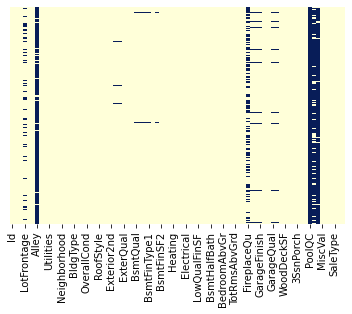

In [4]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap="YlGnBu")

<AxesSubplot:>

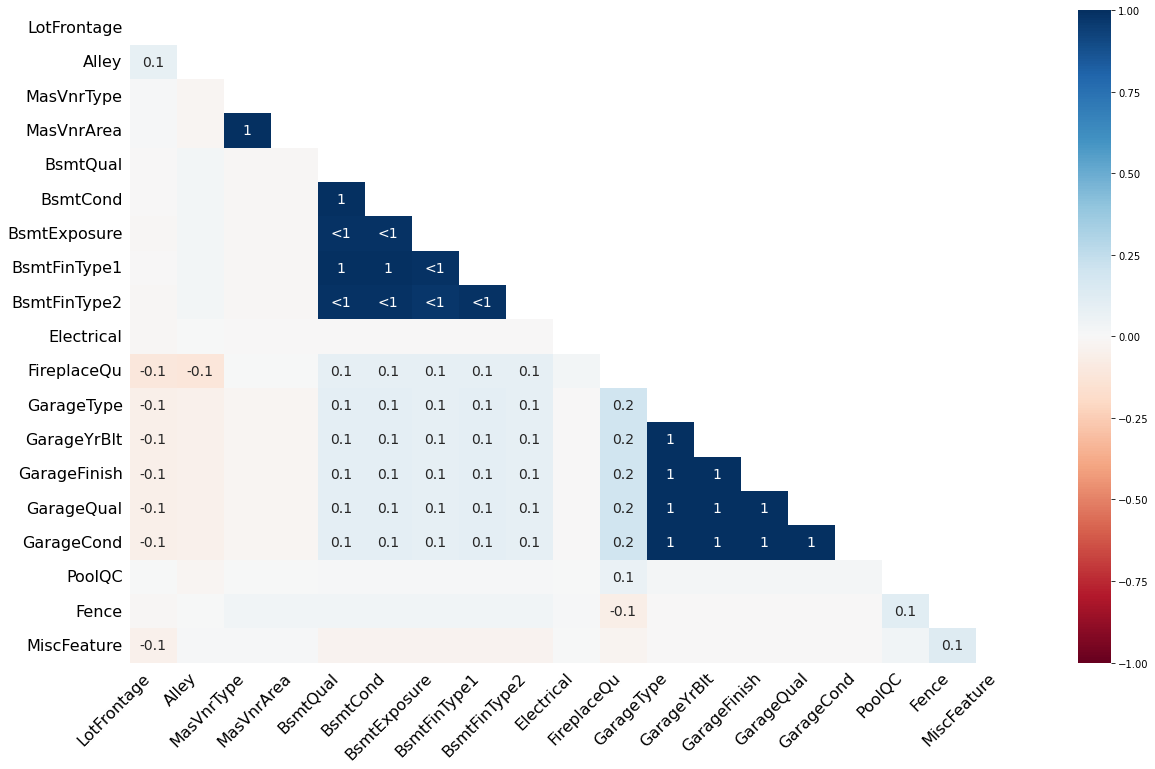

In [5]:
msno.heatmap(df) #corrlations

# Imputation the missing values
Basically, here if I had a Null observations over than 50% I would drop the feature

In [6]:
df.drop(['Alley'],axis=1,inplace=True)
df.drop(['GarageYrBlt'],axis=1,inplace=True)
df.drop(['PoolQC','Fence','MiscFeature'],axis=1,inplace=True)
df.drop(['Id'],axis=1,inplace=True)


In [7]:
df['LotFrontage']=df['LotFrontage'].fillna(df['LotFrontage'].mean())
df['BsmtCond']=df['BsmtCond'].fillna(df['BsmtCond'].mode()[0])#mode of this column
df['BsmtQual']=df['BsmtQual'].fillna(df['BsmtQual'].mode()[0])
df['FireplaceQu']=df['FireplaceQu'].fillna(df['FireplaceQu'].mode()[0])
df['GarageType']=df['GarageType'].fillna(df['GarageType'].mode()[0])
df['GarageFinish']=df['GarageFinish'].fillna(df['GarageFinish'].mode()[0])
df['GarageQual']=df['GarageQual'].fillna(df['GarageQual'].mode()[0])
df['GarageCond']=df['GarageCond'].fillna(df['GarageCond'].mode()[0])
df['MasVnrType']=df['MasVnrType'].fillna(df['MasVnrType'].mode()[0])
df['MasVnrArea']=df['MasVnrArea'].fillna(df['MasVnrArea'].mode()[0])
df['BsmtExposure']=df['BsmtExposure'].fillna(df['BsmtExposure'].mode()[0])
df['BsmtFinType2']=df['BsmtFinType2'].fillna(df['BsmtFinType2'].mode()[0])
df.dropna(inplace=True)


In [8]:
df.isnull().sum()

MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
Street           0
LotShape         0
LandContour      0
Utilities        0
LotConfig        0
LandSlope        0
Neighborhood     0
Condition1       0
Condition2       0
BldgType         0
HouseStyle       0
OverallQual      0
OverallCond      0
YearBuilt        0
YearRemodAdd     0
RoofStyle        0
RoofMatl         0
Exterior1st      0
Exterior2nd      0
MasVnrType       0
MasVnrArea       0
ExterQual        0
ExterCond        0
Foundation       0
BsmtQual         0
BsmtCond         0
BsmtExposure     0
BsmtFinType1     0
BsmtFinSF1       0
BsmtFinType2     0
BsmtFinSF2       0
BsmtUnfSF        0
TotalBsmtSF      0
Heating          0
HeatingQC        0
CentralAir       0
Electrical       0
1stFlrSF         0
2ndFlrSF         0
LowQualFinSF     0
GrLivArea        0
BsmtFullBath     0
BsmtHalfBath     0
FullBath         0
HalfBath         0
BedroomAbvGr     0
KitchenAbvGr     0
KitchenQual      0
TotRmsAbvGrd

In [9]:
df.shape

(1422, 75)

In [10]:
df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,12,2008,WD,Normal,250000


In [11]:
#Assigning categorical features to a variable
categorical_columns=df.select_dtypes(include=['object']).columns.tolist()
print(f'There is {len(categorical_columns)} categorical feature')
categorical_columns

There is 39 categorical feature


['MSZoning',
 'Street',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'SaleType',
 'SaleCondition']

In [12]:
main_data=df.copy()

In [13]:
concat_df=pd.read_csv('Project_data/handledtestdata.csv')

In [14]:
house_prices=pd.concat([df,concat_df],axis=0) #horizontal concatenation
house_prices.shape

(2881, 75)

In [15]:
# Function converting categorical to numerical values
def category_onehot_multcols(multcolumns):
    final_df=house_prices
    i=0
    for fields in multcolumns:
        
        print(fields)
        df1=pd.get_dummies(house_prices[fields],drop_first=True)
        
        house_prices.drop([fields],axis=1,inplace=True)
        if i==0:
            final_df=df1.copy()
        else:
            
            final_df=pd.concat([final_df,df1],axis=1)
        i=i+1
       
        
    final_df=pd.concat([house_prices,final_df],axis=1)
        
    return final_df

In [16]:
house_prices=category_onehot_multcols(categorical_columns)

MSZoning
Street
LotShape
LandContour
Utilities
LotConfig
LandSlope
Neighborhood
Condition1
Condition2
BldgType
HouseStyle
RoofStyle
RoofMatl
Exterior1st
Exterior2nd
MasVnrType
ExterQual
ExterCond
Foundation
BsmtQual
BsmtCond
BsmtExposure
BsmtFinType1
BsmtFinType2
Heating
HeatingQC
CentralAir
Electrical
KitchenQual
Functional
FireplaceQu
GarageType
GarageFinish
GarageQual
GarageCond
PavedDrive
SaleType
SaleCondition


In [17]:
house_prices.shape

(2881, 235)

In [18]:
final_df =house_prices.loc[:,~house_prices.columns.duplicated()] #removing duplicates columns

In [19]:
final_df.shape

(2881, 175)

In [20]:
df_Train=final_df.iloc[:1422,:] #The number of observations in train data
df_Test=final_df.iloc[1422:,:]

In [21]:
df_Train.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,ConLI,ConLw,New,Oth,WD,AdjLand,Alloca,Family,Normal,Partial
0,60,65.0,8450,7,5,2003,2003,196.0,706.0,0.0,...,0,0,0,0,1,0,0,0,1,0
1,20,80.0,9600,6,8,1976,1976,0.0,978.0,0.0,...,0,0,0,0,1,0,0,0,1,0
2,60,68.0,11250,7,5,2001,2002,162.0,486.0,0.0,...,0,0,0,0,1,0,0,0,1,0
3,70,60.0,9550,7,5,1915,1970,0.0,216.0,0.0,...,0,0,0,0,1,0,0,0,0,0
4,60,84.0,14260,8,5,2000,2000,350.0,655.0,0.0,...,0,0,0,0,1,0,0,0,1,0


In [22]:
#Dropping the saleprice column because its values are NaN in test data anyway
df_Test.drop(['SalePrice'],axis=1,inplace=True)

C:\Users\ameen\AppData\Local\Temp\ipykernel_12788\191225162.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_Test.drop(['SalePrice'],axis=1,inplace=True)


In [23]:
df_Test.shape

(1459, 174)

In [24]:
X_train=df_Train.drop(['SalePrice'],axis=1)
Y_train=df_Train['SalePrice']

# Prediciton and choosing the proper Algorithm


In [25]:
#XGBRegressor
classifier=xgboost.XGBRegressor()

In [26]:
classifier.fit(X_train,Y_train)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, ...)

In [27]:
# Saving as a pickle, so we won't train it again and again
filename = 'Project_data/finalized_model.pkl'
pickle.dump(classifier, open(filename, 'wb'))

In [28]:
Y_pred=classifier.predict(df_Test)
Y_pred

array([127646.5 , 144463.1 , 204446.92, ..., 153905.22, 105750.84,
       233470.75], dtype=float32)

In [29]:
pred_df=pd.DataFrame(Y_pred) #Converting to DF
submission_df=pd.read_csv('Project_data/sample_submission.csv') #Reading website's sample as csv
datasets=pd.concat([submission_df['Id'],pred_df],axis=1) #Taking the ID from the submission after we deleted it at the beggning
datasets.columns=['Id','SalePrice']
datasets.to_csv('sample_submission.csv',index=False)

# First Result
Here we can see our first sumbit and its result scoring 0.143
![First result](Results/XGBRegressor.png)

In [30]:
#Random Forest Regressor
regressor = RandomForestRegressor(n_estimators = 100, random_state = 0)


In [31]:
Y_pred = regressor.fit(X_train,Y_train)


In [32]:
Y_pred = regressor.predict(df_Test)

In [33]:
##Create Sample Submission file and Submit using ANN
pred_df=pd.DataFrame(Y_pred) #Converting to DF
submission_df=pd.read_csv('Project_data/sample_submission.csv') #Reading website's sample as csv
datasets=pd.concat([submission_df['Id'],pred_df],axis=1) #Taking the ID from the submission after we deleted it at the beggning
datasets.columns=['Id','SalePrice']
datasets.to_csv('sample_submission.csv',index=False)

In [34]:
# Linear Regression
reg = linear_model.LinearRegression()

In [35]:
Y_pred = reg.fit(X_train, Y_train)

In [36]:
Y_pred = reg.predict(df_Test)

In [37]:
##Create Sample Submission file and Submit using ANN
pred_df=pd.DataFrame(Y_pred) #Converting to DF
submission_df=pd.read_csv('Project_data/sample_submission.csv') #Reading website's sample as csv
datasets=pd.concat([submission_df['Id'],pred_df],axis=1) #Taking the ID from the submission after we deleted it at the beggning
datasets.columns=['Id','SalePrice']
datasets.to_csv('sample_submission.csv',index=False)

# ML Results
Here are the main results of the ML algorthims that have been applied above
![ML results](Results/ML.JPG)

# Improvments
Imporving XGB results by hyper parameter optimization and randomized search CV

In [38]:
regressor=xgboost.XGBRegressor()
booster=['gbtree','gblinear']
base_score=[0.25,0.5,0.75,1]

In [39]:
## Hyper Parameter Optimization

n_estimators = [100, 500, 900, 1100, 1500]
max_depth = [2, 3, 5, 10, 15]
booster=['gbtree','gblinear']
learning_rate=[0.025,0.1,0.15,0.20]
min_child_weight=[1,2,3,4]

# Define the grid of hyperparameters to search
hyperparameter_grid = {
    'n_estimators': n_estimators,
    'max_depth':max_depth,
    'learning_rate':learning_rate,
    'min_child_weight':min_child_weight,
    'booster':booster,
    'base_score':base_score
    }

In [40]:
# Set up the random search with 4-fold cross validation
random_cv = sklearn.model_selection.RandomizedSearchCV(estimator=regressor,
            param_distributions=hyperparameter_grid,
            cv=5, n_iter=50,
            scoring = 'neg_mean_absolute_error',n_jobs = 4,
            verbose = 5, 
            return_train_score = True,
            random_state=42)

In [41]:
random_cv.fit(X_train,Y_train)


Fitting 5 folds for each of 50 candidates, totalling 250 fits


RandomizedSearchCV(cv=5,
                   estimator=XGBRegressor(base_score=None, booster=None,
                                          callbacks=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None,
                                          early_stopping_rounds=None,
                                          enable_categorical=False,
                                          eval_metric=None, gamma=None,
                                          gpu_id=None, grow_policy=None,
                                          importance_type=None,
                                          interaction_constraints=None,
                                          learning_rate=None, max_bin=None,
                                          m...
                                          reg_alpha=None, reg_lambda=None, ...),
                   n_iter=50, n_jobs=4,
                   param_distributions={'base_score': [0.25, 0.5, 0.75, 1],
                                        'booster': ['gbtree', 'gblinear'],
                                        'learning_rate': [0.025, 0.1, 0.15,
                                                          0.2],
                                        'max_depth': [2, 3, 5, 10, 15],
                                        'min_child_weight': [1, 2, 3, 4],
                                        'n_estimators': [100, 500, 900, 1100,
                                                         1500]},
                   random_state=42, return_train_score=True,
                   scoring='neg_mean_absolute_error', verbose=5)

In [42]:
best_esti=random_cv.best_estimator_

In [43]:
best_esti

XGBRegressor(base_score=0.25, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.1, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=2, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=900, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, ...)

In [44]:
regressor=xgboost.XGBRegressor(base_score=0.25, booster='gbtree',callbacks=None, colsample_bylevel=1,colsample_bynode=1,
       colsample_bytree=1,early_stopping_rounds=None, enable_categorical=False,
                              eval_metric=None,  gamma=0,gpu_id=-1,grow_policy='depthwise',importance_type=None,interaction_constraints='',
                               learning_rate=0.1,max_bin=256, max_cat_to_onehot=4, max_delta_step=0,
       max_depth=2,max_leaves=0, min_child_weight=1,monotone_constraints='()', n_estimators=900,
       n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

In [45]:
regressor.fit(X_train,Y_train)

[16:59:33] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[16:59:33] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




XGBRegressor(base_score=0.25, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.1, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=2, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=900, n_jobs=1,
             nthread=1, num_parallel_tree=1, objective='reg:linear',
             predictor='auto', random_state=0, ...)

In [46]:
filename = 'finalized_model.pkl'
pickle.dump(classifier, open(filename, 'wb'))

In [47]:
Y_pred = regressor.predict(df_Test)

In [48]:
pred_df=pd.DataFrame(Y_pred) #Converting to DF
submission_df=pd.read_csv('Project_data/sample_submission.csv') #Reading website's sample as csv
datasets=pd.concat([submission_df['Id'],pred_df],axis=1) #Taking the ID from the submission after we deleted it at the beggning
datasets.columns=['Id','SalePrice']
datasets.to_csv('sample_submission.csv',index=False)

# Artifical Neural Network
Using ANN as well to imporve the precision of the model 

In [49]:
#keras.layers.Dense(units, activation=None, use_bias=True, kernel_initializer='glorot_uniform', bias_initializer='zeros', kernel_regularizer=None, bias_regularizer=None, activity_regularizer=None, kernel_constraint=None, bias_constraint=None)
#classifier.add(Dense(6, activation='relu', kernel_initializer='glorot_uniform',input_dim=11))


# Initialising the Artifical Neural Network
classifier = Sequential()

# Adding the input layer and the first hidden layer
classifier.add(Dense(50, kernel_initializer = 'he_uniform',activation='relu',input_dim = 174))

# Adding the second hidden layer
classifier.add(Dense(50, kernel_initializer = 'he_uniform',activation='relu'))

# Adding the third hidden layer
classifier.add(Dense(50, kernel_initializer = 'he_uniform',activation='relu'))
# Adding the output layer
classifier.add(Dense(1, kernel_initializer = 'he_uniform'))

# Compiling the ANN
classifier.compile(loss=tf.keras.losses.MeanSquaredError(), optimizer='Adamax')

# Fitting the ANN to the Training set
model_history=classifier.fit(X_train.values, Y_train.values,validation_split=0.20, batch_size = 10, epochs = 2000)

Epoch 1/2000
114/114 [==============================] - 1s 2ms/step - loss: 35231068160.0000 - val_loss: 28340922368.0000
Epoch 2/2000
114/114 [==============================] - 0s 1ms/step - loss: 16063160320.0000 - val_loss: 8699286528.0000
Epoch 3/2000
114/114 [==============================] - 0s 1ms/step - loss: 7325543936.0000 - val_loss: 5637751296.0000
Epoch 4/2000
114/114 [==============================] - 0s 1ms/step - loss: 6109664768.0000 - val_loss: 5244301312.0000
Epoch 5/2000
114/114 [==============================] - 0s 1ms/step - loss: 5698206720.0000 - val_loss: 5069890048.0000
Epoch 6/2000
114/114 [==============================] - 0s 1ms/step - loss: 5425005568.0000 - val_loss: 4964805120.0000
Epoch 7/2000
114/114 [==============================] - 0s 1ms/step - loss: 5160585728.0000 - val_loss: 4863338496.0000
Epoch 8/2000
114/114 [==============================] - 0s 1ms/step - loss: 4930681856.0000 - val_loss: 4769006592.0000
Epoch 9/2000
114/114 [===============

Epoch 69/2000
114/114 [==============================] - 0s 1ms/step - loss: 1528498688.0000 - val_loss: 3398163712.0000
Epoch 70/2000
114/114 [==============================] - 0s 1ms/step - loss: 1525514624.0000 - val_loss: 3331622912.0000
Epoch 71/2000
114/114 [==============================] - 0s 1ms/step - loss: 1512727424.0000 - val_loss: 3345656064.0000
Epoch 72/2000
114/114 [==============================] - 0s 1ms/step - loss: 1516230272.0000 - val_loss: 3444244224.0000
Epoch 73/2000
114/114 [==============================] - 0s 1ms/step - loss: 1517529216.0000 - val_loss: 3397200896.0000
Epoch 74/2000
114/114 [==============================] - 0s 1ms/step - loss: 1513115264.0000 - val_loss: 3462404864.0000
Epoch 75/2000
114/114 [==============================] - 0s 1ms/step - loss: 1506126720.0000 - val_loss: 3406097920.0000
Epoch 76/2000
114/114 [==============================] - 0s 1ms/step - loss: 1502285440.0000 - val_loss: 3396726016.0000
Epoch 77/2000
114/114 [=========

114/114 [==============================] - 0s 1ms/step - loss: 1404820608.0000 - val_loss: 3420774656.0000
Epoch 137/2000
114/114 [==============================] - 0s 1ms/step - loss: 1386673536.0000 - val_loss: 3345494528.0000
Epoch 138/2000
114/114 [==============================] - 0s 1ms/step - loss: 1385448064.0000 - val_loss: 3432960512.0000
Epoch 139/2000
114/114 [==============================] - 0s 1ms/step - loss: 1390137472.0000 - val_loss: 3369110784.0000
Epoch 140/2000
114/114 [==============================] - 0s 1ms/step - loss: 1394634496.0000 - val_loss: 3307261696.0000
Epoch 141/2000
114/114 [==============================] - 0s 1ms/step - loss: 1394055680.0000 - val_loss: 3303185152.0000
Epoch 142/2000
114/114 [==============================] - 0s 1ms/step - loss: 1385116288.0000 - val_loss: 3404316160.0000
Epoch 143/2000
114/114 [==============================] - 0s 1ms/step - loss: 1383651840.0000 - val_loss: 3318200576.0000
Epoch 144/2000
114/114 [===============

114/114 [==============================] - 0s 1ms/step - loss: 1297743232.0000 - val_loss: 3257401344.0000
Epoch 204/2000
114/114 [==============================] - 0s 1ms/step - loss: 1293548544.0000 - val_loss: 3206170880.0000
Epoch 205/2000
114/114 [==============================] - 0s 1ms/step - loss: 1296825728.0000 - val_loss: 3173942016.0000
Epoch 206/2000
114/114 [==============================] - 0s 1ms/step - loss: 1297661568.0000 - val_loss: 3134750720.0000
Epoch 207/2000
114/114 [==============================] - 0s 1ms/step - loss: 1284455168.0000 - val_loss: 3230053376.0000
Epoch 208/2000
114/114 [==============================] - 0s 1ms/step - loss: 1274730112.0000 - val_loss: 3142745344.0000
Epoch 209/2000
114/114 [==============================] - 0s 1ms/step - loss: 1289546112.0000 - val_loss: 3187422976.0000
Epoch 210/2000
114/114 [==============================] - 0s 1ms/step - loss: 1292110848.0000 - val_loss: 3139926272.0000
Epoch 211/2000
114/114 [===============

114/114 [==============================] - 0s 1ms/step - loss: 1203327744.0000 - val_loss: 3021888256.0000
Epoch 271/2000
114/114 [==============================] - 0s 1ms/step - loss: 1201015040.0000 - val_loss: 3026401280.0000
Epoch 272/2000
114/114 [==============================] - 0s 1ms/step - loss: 1197776896.0000 - val_loss: 3073122304.0000
Epoch 273/2000
114/114 [==============================] - 0s 1ms/step - loss: 1196908672.0000 - val_loss: 2940484352.0000
Epoch 274/2000
114/114 [==============================] - 0s 1ms/step - loss: 1196905344.0000 - val_loss: 2971416064.0000
Epoch 275/2000
114/114 [==============================] - 0s 1ms/step - loss: 1197462656.0000 - val_loss: 2992559872.0000
Epoch 276/2000
114/114 [==============================] - 0s 1ms/step - loss: 1198453504.0000 - val_loss: 2996659456.0000
Epoch 277/2000
114/114 [==============================] - 0s 1ms/step - loss: 1190181888.0000 - val_loss: 3047567616.0000
Epoch 278/2000
114/114 [===============

114/114 [==============================] - 0s 1ms/step - loss: 1111671040.0000 - val_loss: 2950494976.0000
Epoch 338/2000
114/114 [==============================] - 0s 1ms/step - loss: 1123438080.0000 - val_loss: 2889466112.0000
Epoch 339/2000
114/114 [==============================] - 0s 1ms/step - loss: 1118772736.0000 - val_loss: 2809351424.0000
Epoch 340/2000
114/114 [==============================] - 0s 1ms/step - loss: 1117126016.0000 - val_loss: 2889188352.0000
Epoch 341/2000
114/114 [==============================] - 0s 1ms/step - loss: 1119716736.0000 - val_loss: 2802912000.0000
Epoch 342/2000
114/114 [==============================] - 0s 1ms/step - loss: 1124610176.0000 - val_loss: 2806353152.0000
Epoch 343/2000
114/114 [==============================] - 0s 1ms/step - loss: 1111903232.0000 - val_loss: 2825373184.0000
Epoch 344/2000
114/114 [==============================] - 0s 1ms/step - loss: 1111171712.0000 - val_loss: 2811439872.0000
Epoch 345/2000
114/114 [===============

114/114 [==============================] - 0s 1ms/step - loss: 1039671488.0000 - val_loss: 2618106368.0000
Epoch 405/2000
114/114 [==============================] - 0s 1ms/step - loss: 1031898048.0000 - val_loss: 2631049216.0000
Epoch 406/2000
114/114 [==============================] - 0s 1ms/step - loss: 1051321600.0000 - val_loss: 2666934784.0000
Epoch 407/2000
114/114 [==============================] - 0s 1ms/step - loss: 1039618944.0000 - val_loss: 2674391040.0000
Epoch 408/2000
114/114 [==============================] - 0s 1ms/step - loss: 1046669952.0000 - val_loss: 2664616448.0000
Epoch 409/2000
114/114 [==============================] - 0s 1ms/step - loss: 1034334016.0000 - val_loss: 2595244800.0000
Epoch 410/2000
114/114 [==============================] - 0s 1ms/step - loss: 1045460352.0000 - val_loss: 2560929280.0000
Epoch 411/2000
114/114 [==============================] - 0s 1ms/step - loss: 1047172928.0000 - val_loss: 2573378816.0000
Epoch 412/2000
114/114 [===============

114/114 [==============================] - 0s 1ms/step - loss: 964594368.0000 - val_loss: 2394722304.0000
Epoch 472/2000
114/114 [==============================] - 0s 1ms/step - loss: 971734464.0000 - val_loss: 2376879104.0000
Epoch 473/2000
114/114 [==============================] - 0s 1ms/step - loss: 953062080.0000 - val_loss: 2392817664.0000
Epoch 474/2000
114/114 [==============================] - 0s 1ms/step - loss: 971047552.0000 - val_loss: 2397248512.0000
Epoch 475/2000
114/114 [==============================] - 0s 1ms/step - loss: 960654848.0000 - val_loss: 2404064256.0000
Epoch 476/2000
114/114 [==============================] - 0s 1ms/step - loss: 970602432.0000 - val_loss: 2426715648.0000
Epoch 477/2000
114/114 [==============================] - 0s 1ms/step - loss: 960934912.0000 - val_loss: 2353954304.0000
Epoch 478/2000
114/114 [==============================] - 0s 1ms/step - loss: 953373440.0000 - val_loss: 2429372672.0000
Epoch 479/2000
114/114 [=======================

Epoch 539/2000
114/114 [==============================] - 0s 1ms/step - loss: 887749760.0000 - val_loss: 2214368000.0000
Epoch 540/2000
114/114 [==============================] - 0s 1ms/step - loss: 879495744.0000 - val_loss: 2184537600.0000
Epoch 541/2000
114/114 [==============================] - 0s 1ms/step - loss: 876678848.0000 - val_loss: 2176259328.0000
Epoch 542/2000
114/114 [==============================] - 0s 1ms/step - loss: 881774400.0000 - val_loss: 2240840704.0000
Epoch 543/2000
114/114 [==============================] - 0s 1ms/step - loss: 875174912.0000 - val_loss: 2195068672.0000
Epoch 544/2000
114/114 [==============================] - 0s 1ms/step - loss: 878680256.0000 - val_loss: 2160148992.0000
Epoch 545/2000
114/114 [==============================] - 0s 1ms/step - loss: 862917760.0000 - val_loss: 2258365440.0000
Epoch 546/2000
114/114 [==============================] - 0s 1ms/step - loss: 893387392.0000 - val_loss: 2127245440.0000
Epoch 547/2000
114/114 [========

114/114 [==============================] - 0s 1ms/step - loss: 786512192.0000 - val_loss: 1937990144.0000
Epoch 607/2000
114/114 [==============================] - 0s 1ms/step - loss: 794115136.0000 - val_loss: 1964863104.0000
Epoch 608/2000
114/114 [==============================] - 0s 1ms/step - loss: 794320832.0000 - val_loss: 2007014912.0000
Epoch 609/2000
114/114 [==============================] - 0s 1ms/step - loss: 775061568.0000 - val_loss: 2083498880.0000
Epoch 610/2000
114/114 [==============================] - 0s 1ms/step - loss: 788606080.0000 - val_loss: 1978807040.0000
Epoch 611/2000
114/114 [==============================] - 0s 1ms/step - loss: 769114240.0000 - val_loss: 1960830720.0000
Epoch 612/2000
114/114 [==============================] - 0s 1ms/step - loss: 781901632.0000 - val_loss: 1999578752.0000
Epoch 613/2000
114/114 [==============================] - 0s 1ms/step - loss: 771896768.0000 - val_loss: 1920326912.0000
Epoch 614/2000
114/114 [=======================

Epoch 674/2000
114/114 [==============================] - 0s 1ms/step - loss: 689164864.0000 - val_loss: 1721244416.0000
Epoch 675/2000
114/114 [==============================] - 0s 1ms/step - loss: 687927488.0000 - val_loss: 1771486848.0000
Epoch 676/2000
114/114 [==============================] - 0s 1ms/step - loss: 682398784.0000 - val_loss: 1694497024.0000
Epoch 677/2000
114/114 [==============================] - 0s 1ms/step - loss: 687342016.0000 - val_loss: 1700064128.0000
Epoch 678/2000
114/114 [==============================] - 0s 1ms/step - loss: 679289600.0000 - val_loss: 1669715072.0000
Epoch 679/2000
114/114 [==============================] - 0s 1ms/step - loss: 677822720.0000 - val_loss: 1699044224.0000
Epoch 680/2000
114/114 [==============================] - 0s 1ms/step - loss: 695506368.0000 - val_loss: 1824514176.0000
Epoch 681/2000
114/114 [==============================] - 0s 1ms/step - loss: 679939008.0000 - val_loss: 1724953856.0000
Epoch 682/2000
114/114 [========

114/114 [==============================] - 0s 1ms/step - loss: 619698944.0000 - val_loss: 1518465920.0000
Epoch 742/2000
114/114 [==============================] - 0s 1ms/step - loss: 599643328.0000 - val_loss: 1648768256.0000
Epoch 743/2000
114/114 [==============================] - 0s 1ms/step - loss: 607308992.0000 - val_loss: 1491671168.0000
Epoch 744/2000
114/114 [==============================] - 0s 1ms/step - loss: 610629312.0000 - val_loss: 1516336000.0000
Epoch 745/2000
114/114 [==============================] - 0s 1ms/step - loss: 597297728.0000 - val_loss: 1547450112.0000
Epoch 746/2000
114/114 [==============================] - 0s 1ms/step - loss: 596266624.0000 - val_loss: 1555600128.0000
Epoch 747/2000
114/114 [==============================] - 0s 1ms/step - loss: 594767360.0000 - val_loss: 1536559360.0000
Epoch 748/2000
114/114 [==============================] - 0s 1ms/step - loss: 607666688.0000 - val_loss: 1525865344.0000
Epoch 749/2000
114/114 [=======================

Epoch 809/2000
114/114 [==============================] - 0s 1ms/step - loss: 537785920.0000 - val_loss: 1411996288.0000
Epoch 810/2000
114/114 [==============================] - 0s 1ms/step - loss: 534641312.0000 - val_loss: 1419195136.0000
Epoch 811/2000
114/114 [==============================] - 0s 1ms/step - loss: 539027584.0000 - val_loss: 1404633984.0000
Epoch 812/2000
114/114 [==============================] - 0s 1ms/step - loss: 543887744.0000 - val_loss: 1362764800.0000
Epoch 813/2000
114/114 [==============================] - 0s 1ms/step - loss: 518804192.0000 - val_loss: 1443249792.0000
Epoch 814/2000
114/114 [==============================] - 0s 1ms/step - loss: 539714304.0000 - val_loss: 1397845760.0000
Epoch 815/2000
114/114 [==============================] - 0s 1ms/step - loss: 564577984.0000 - val_loss: 1370964480.0000
Epoch 816/2000
114/114 [==============================] - 0s 1ms/step - loss: 538402880.0000 - val_loss: 1435039744.0000
Epoch 817/2000
114/114 [========

114/114 [==============================] - 0s 1ms/step - loss: 498949216.0000 - val_loss: 1301614208.0000
Epoch 877/2000
114/114 [==============================] - 0s 1ms/step - loss: 485530848.0000 - val_loss: 1315326592.0000
Epoch 878/2000
114/114 [==============================] - 0s 1ms/step - loss: 491626688.0000 - val_loss: 1301866112.0000
Epoch 879/2000
114/114 [==============================] - 0s 1ms/step - loss: 489480416.0000 - val_loss: 1299145088.0000
Epoch 880/2000
114/114 [==============================] - 0s 1ms/step - loss: 494959104.0000 - val_loss: 1314085632.0000
Epoch 881/2000
114/114 [==============================] - 0s 1ms/step - loss: 497242560.0000 - val_loss: 1347071232.0000
Epoch 882/2000
114/114 [==============================] - 0s 2ms/step - loss: 483022784.0000 - val_loss: 1393188224.0000
Epoch 883/2000
114/114 [==============================] - 0s 1ms/step - loss: 492411744.0000 - val_loss: 1298785152.0000
Epoch 884/2000
114/114 [=======================

Epoch 944/2000
114/114 [==============================] - 0s 1ms/step - loss: 458455936.0000 - val_loss: 1267815296.0000
Epoch 945/2000
114/114 [==============================] - 0s 1ms/step - loss: 474920992.0000 - val_loss: 1272408704.0000
Epoch 946/2000
114/114 [==============================] - 0s 1ms/step - loss: 465445312.0000 - val_loss: 1261357824.0000
Epoch 947/2000
114/114 [==============================] - 0s 1ms/step - loss: 456339616.0000 - val_loss: 1298776576.0000
Epoch 948/2000
114/114 [==============================] - 0s 1ms/step - loss: 464862144.0000 - val_loss: 1286637184.0000
Epoch 949/2000
114/114 [==============================] - 0s 1ms/step - loss: 450673760.0000 - val_loss: 1254894720.0000
Epoch 950/2000
114/114 [==============================] - 0s 1ms/step - loss: 464420352.0000 - val_loss: 1275328896.0000
Epoch 951/2000
114/114 [==============================] - 0s 1ms/step - loss: 468954784.0000 - val_loss: 1258983296.0000
Epoch 952/2000
114/114 [========

114/114 [==============================] - 0s 1ms/step - loss: 424540032.0000 - val_loss: 1254457856.0000
Epoch 1012/2000
114/114 [==============================] - 0s 1ms/step - loss: 440251456.0000 - val_loss: 1240416256.0000
Epoch 1013/2000
114/114 [==============================] - 0s 1ms/step - loss: 437523776.0000 - val_loss: 1321321088.0000
Epoch 1014/2000
114/114 [==============================] - 0s 1ms/step - loss: 439753216.0000 - val_loss: 1261717632.0000
Epoch 1015/2000
114/114 [==============================] - 0s 1ms/step - loss: 429284928.0000 - val_loss: 1231067520.0000
Epoch 1016/2000
114/114 [==============================] - 0s 1ms/step - loss: 420883936.0000 - val_loss: 1308630400.0000
Epoch 1017/2000
114/114 [==============================] - 0s 1ms/step - loss: 431964448.0000 - val_loss: 1232733312.0000
Epoch 1018/2000
114/114 [==============================] - 0s 1ms/step - loss: 430414624.0000 - val_loss: 1234351232.0000
Epoch 1019/2000
114/114 [===============

114/114 [==============================] - 0s 1ms/step - loss: 415164416.0000 - val_loss: 1218800768.0000
Epoch 1079/2000
114/114 [==============================] - 0s 1ms/step - loss: 418857824.0000 - val_loss: 1226956928.0000
Epoch 1080/2000
114/114 [==============================] - 0s 1ms/step - loss: 407136576.0000 - val_loss: 1316057216.0000
Epoch 1081/2000
114/114 [==============================] - 0s 1ms/step - loss: 399401216.0000 - val_loss: 1240296448.0000
Epoch 1082/2000
114/114 [==============================] - 0s 1ms/step - loss: 413112512.0000 - val_loss: 1271906048.0000
Epoch 1083/2000
114/114 [==============================] - 0s 1ms/step - loss: 393877632.0000 - val_loss: 1223495552.0000
Epoch 1084/2000
114/114 [==============================] - 0s 1ms/step - loss: 397317152.0000 - val_loss: 1226131584.0000
Epoch 1085/2000
114/114 [==============================] - 0s 1ms/step - loss: 410611360.0000 - val_loss: 1232737280.0000
Epoch 1086/2000
114/114 [===============

114/114 [==============================] - 0s 1ms/step - loss: 370463744.0000 - val_loss: 1213500160.0000
Epoch 1146/2000
114/114 [==============================] - 0s 1ms/step - loss: 390822336.0000 - val_loss: 1212281984.0000
Epoch 1147/2000
114/114 [==============================] - 0s 1ms/step - loss: 391758848.0000 - val_loss: 1216365440.0000
Epoch 1148/2000
114/114 [==============================] - 0s 1ms/step - loss: 372866656.0000 - val_loss: 1207406464.0000
Epoch 1149/2000
114/114 [==============================] - 0s 1ms/step - loss: 382991520.0000 - val_loss: 1247968768.0000
Epoch 1150/2000
114/114 [==============================] - 0s 1ms/step - loss: 384071200.0000 - val_loss: 1219505792.0000
Epoch 1151/2000
114/114 [==============================] - 0s 1ms/step - loss: 388978400.0000 - val_loss: 1313397760.0000
Epoch 1152/2000
114/114 [==============================] - 0s 1ms/step - loss: 382480544.0000 - val_loss: 1264571008.0000
Epoch 1153/2000
114/114 [===============

114/114 [==============================] - 0s 1ms/step - loss: 372173120.0000 - val_loss: 1301326592.0000
Epoch 1213/2000
114/114 [==============================] - 0s 1ms/step - loss: 383031424.0000 - val_loss: 1219618560.0000
Epoch 1214/2000
114/114 [==============================] - 0s 1ms/step - loss: 351882400.0000 - val_loss: 1204518272.0000
Epoch 1215/2000
114/114 [==============================] - 0s 1ms/step - loss: 374368992.0000 - val_loss: 1214672768.0000
Epoch 1216/2000
114/114 [==============================] - 0s 1ms/step - loss: 359325920.0000 - val_loss: 1197621504.0000
Epoch 1217/2000
114/114 [==============================] - 0s 1ms/step - loss: 358336480.0000 - val_loss: 1228743552.0000
Epoch 1218/2000
114/114 [==============================] - 0s 1ms/step - loss: 373557024.0000 - val_loss: 1362847232.0000
Epoch 1219/2000
114/114 [==============================] - 0s 1ms/step - loss: 369117152.0000 - val_loss: 1195317632.0000
Epoch 1220/2000
114/114 [===============

114/114 [==============================] - 0s 1ms/step - loss: 329137536.0000 - val_loss: 1169490176.0000
Epoch 1280/2000
114/114 [==============================] - 0s 1ms/step - loss: 333774208.0000 - val_loss: 1174536576.0000
Epoch 1281/2000
114/114 [==============================] - 0s 1ms/step - loss: 345060672.0000 - val_loss: 1182769664.0000
Epoch 1282/2000
114/114 [==============================] - 0s 1ms/step - loss: 335334784.0000 - val_loss: 1178653440.0000
Epoch 1283/2000
114/114 [==============================] - 0s 1ms/step - loss: 332050272.0000 - val_loss: 1194743552.0000
Epoch 1284/2000
114/114 [==============================] - 0s 1ms/step - loss: 342821280.0000 - val_loss: 1216392192.0000
Epoch 1285/2000
114/114 [==============================] - 0s 1ms/step - loss: 346960640.0000 - val_loss: 1222006912.0000
Epoch 1286/2000
114/114 [==============================] - 0s 1ms/step - loss: 345925344.0000 - val_loss: 1190373120.0000
Epoch 1287/2000
114/114 [===============

114/114 [==============================] - 0s 1ms/step - loss: 337165888.0000 - val_loss: 1159160576.0000
Epoch 1347/2000
114/114 [==============================] - 0s 1ms/step - loss: 324549728.0000 - val_loss: 1176730240.0000
Epoch 1348/2000
114/114 [==============================] - 0s 1ms/step - loss: 330131424.0000 - val_loss: 1202994688.0000
Epoch 1349/2000
114/114 [==============================] - 0s 1ms/step - loss: 329753728.0000 - val_loss: 1178042624.0000
Epoch 1350/2000
114/114 [==============================] - 0s 1ms/step - loss: 339204992.0000 - val_loss: 1220018816.0000
Epoch 1351/2000
114/114 [==============================] - 0s 1ms/step - loss: 326362944.0000 - val_loss: 1183649664.0000
Epoch 1352/2000
114/114 [==============================] - 0s 1ms/step - loss: 321899520.0000 - val_loss: 1196765440.0000
Epoch 1353/2000
114/114 [==============================] - 0s 1ms/step - loss: 317861184.0000 - val_loss: 1228423680.0000
Epoch 1354/2000
114/114 [===============

114/114 [==============================] - 0s 1ms/step - loss: 305362464.0000 - val_loss: 1202523648.0000
Epoch 1414/2000
114/114 [==============================] - 0s 1ms/step - loss: 301534464.0000 - val_loss: 1211561856.0000
Epoch 1415/2000
114/114 [==============================] - 0s 1ms/step - loss: 317076544.0000 - val_loss: 1175201024.0000
Epoch 1416/2000
114/114 [==============================] - 0s 1ms/step - loss: 303415328.0000 - val_loss: 1166171904.0000
Epoch 1417/2000
114/114 [==============================] - 0s 1ms/step - loss: 317962720.0000 - val_loss: 1187064192.0000
Epoch 1418/2000
114/114 [==============================] - 0s 1ms/step - loss: 310970208.0000 - val_loss: 1221994240.0000
Epoch 1419/2000
114/114 [==============================] - 0s 1ms/step - loss: 313344992.0000 - val_loss: 1172731648.0000
Epoch 1420/2000
114/114 [==============================] - 0s 1ms/step - loss: 300250144.0000 - val_loss: 1191068800.0000
Epoch 1421/2000
114/114 [===============

114/114 [==============================] - 0s 1ms/step - loss: 289323968.0000 - val_loss: 1173031808.0000
Epoch 1481/2000
114/114 [==============================] - 0s 1ms/step - loss: 307512736.0000 - val_loss: 1189076992.0000
Epoch 1482/2000
114/114 [==============================] - 0s 1ms/step - loss: 320504384.0000 - val_loss: 1152949760.0000
Epoch 1483/2000
114/114 [==============================] - 0s 1ms/step - loss: 293284480.0000 - val_loss: 1173051904.0000
Epoch 1484/2000
114/114 [==============================] - 0s 1ms/step - loss: 283574560.0000 - val_loss: 1189626368.0000
Epoch 1485/2000
114/114 [==============================] - 0s 1ms/step - loss: 295976704.0000 - val_loss: 1176649728.0000
Epoch 1486/2000
114/114 [==============================] - 0s 1ms/step - loss: 289597792.0000 - val_loss: 1198485248.0000
Epoch 1487/2000
114/114 [==============================] - 0s 1ms/step - loss: 283282880.0000 - val_loss: 1170610560.0000
Epoch 1488/2000
114/114 [===============

114/114 [==============================] - 0s 1ms/step - loss: 290530048.0000 - val_loss: 1150583296.0000
Epoch 1548/2000
114/114 [==============================] - 0s 1ms/step - loss: 282370752.0000 - val_loss: 1157684480.0000
Epoch 1549/2000
114/114 [==============================] - 0s 1ms/step - loss: 279557280.0000 - val_loss: 1147573120.0000
Epoch 1550/2000
114/114 [==============================] - 0s 1ms/step - loss: 269393344.0000 - val_loss: 1156035328.0000
Epoch 1551/2000
114/114 [==============================] - 0s 1ms/step - loss: 303395456.0000 - val_loss: 1266969600.0000
Epoch 1552/2000
114/114 [==============================] - 0s 1ms/step - loss: 278049024.0000 - val_loss: 1154714112.0000
Epoch 1553/2000
114/114 [==============================] - 0s 1ms/step - loss: 267596544.0000 - val_loss: 1190179328.0000
Epoch 1554/2000
114/114 [==============================] - 0s 1ms/step - loss: 277198592.0000 - val_loss: 1135874816.0000
Epoch 1555/2000
114/114 [===============

114/114 [==============================] - 0s 1ms/step - loss: 262159280.0000 - val_loss: 1163202048.0000
Epoch 1615/2000
114/114 [==============================] - 0s 1ms/step - loss: 262329632.0000 - val_loss: 1146214528.0000
Epoch 1616/2000
114/114 [==============================] - 0s 1ms/step - loss: 273717888.0000 - val_loss: 1166116480.0000
Epoch 1617/2000
114/114 [==============================] - 0s 1ms/step - loss: 265077504.0000 - val_loss: 1268295296.0000
Epoch 1618/2000
114/114 [==============================] - 0s 1ms/step - loss: 263437232.0000 - val_loss: 1176305792.0000
Epoch 1619/2000
114/114 [==============================] - 0s 1ms/step - loss: 274058496.0000 - val_loss: 1145119488.0000
Epoch 1620/2000
114/114 [==============================] - 0s 1ms/step - loss: 263414144.0000 - val_loss: 1152578560.0000
Epoch 1621/2000
114/114 [==============================] - 0s 1ms/step - loss: 263538064.0000 - val_loss: 1180267776.0000
Epoch 1622/2000
114/114 [===============

114/114 [==============================] - 0s 2ms/step - loss: 253076976.0000 - val_loss: 1183005952.0000
Epoch 1682/2000
114/114 [==============================] - 0s 1ms/step - loss: 254900320.0000 - val_loss: 1197472128.0000
Epoch 1683/2000
114/114 [==============================] - 0s 1ms/step - loss: 252369216.0000 - val_loss: 1170030208.0000
Epoch 1684/2000
114/114 [==============================] - 0s 1ms/step - loss: 263657120.0000 - val_loss: 1168413184.0000
Epoch 1685/2000
114/114 [==============================] - 0s 1ms/step - loss: 258733440.0000 - val_loss: 1154538496.0000
Epoch 1686/2000
114/114 [==============================] - 0s 1ms/step - loss: 256418592.0000 - val_loss: 1168305408.0000
Epoch 1687/2000
114/114 [==============================] - 0s 1ms/step - loss: 269667008.0000 - val_loss: 1193458688.0000
Epoch 1688/2000
114/114 [==============================] - 0s 1ms/step - loss: 268263088.0000 - val_loss: 1122068992.0000
Epoch 1689/2000
114/114 [===============

114/114 [==============================] - 0s 1ms/step - loss: 240327552.0000 - val_loss: 1129470592.0000
Epoch 1749/2000
114/114 [==============================] - 0s 1ms/step - loss: 255179808.0000 - val_loss: 1115475840.0000
Epoch 1750/2000
114/114 [==============================] - 0s 1ms/step - loss: 253260560.0000 - val_loss: 1128899968.0000
Epoch 1751/2000
114/114 [==============================] - 0s 1ms/step - loss: 241057776.0000 - val_loss: 1129530496.0000
Epoch 1752/2000
114/114 [==============================] - 0s 1ms/step - loss: 252409424.0000 - val_loss: 1133696256.0000
Epoch 1753/2000
114/114 [==============================] - 0s 1ms/step - loss: 241078240.0000 - val_loss: 1128144896.0000
Epoch 1754/2000
114/114 [==============================] - 0s 1ms/step - loss: 245521424.0000 - val_loss: 1129954176.0000
Epoch 1755/2000
114/114 [==============================] - 0s 1ms/step - loss: 258350672.0000 - val_loss: 1115118336.0000
Epoch 1756/2000
114/114 [===============

114/114 [==============================] - 0s 1ms/step - loss: 247700432.0000 - val_loss: 1139766016.0000
Epoch 1816/2000
114/114 [==============================] - 0s 1ms/step - loss: 234249616.0000 - val_loss: 1186247040.0000
Epoch 1817/2000
114/114 [==============================] - 0s 1ms/step - loss: 253664864.0000 - val_loss: 1135954688.0000
Epoch 1818/2000
114/114 [==============================] - 0s 1ms/step - loss: 256108032.0000 - val_loss: 1160597888.0000
Epoch 1819/2000
114/114 [==============================] - 0s 1ms/step - loss: 238757104.0000 - val_loss: 1123559424.0000
Epoch 1820/2000
114/114 [==============================] - 0s 1ms/step - loss: 242874256.0000 - val_loss: 1129512448.0000
Epoch 1821/2000
114/114 [==============================] - 0s 1ms/step - loss: 236456048.0000 - val_loss: 1119137408.0000
Epoch 1822/2000
114/114 [==============================] - 0s 1ms/step - loss: 234589280.0000 - val_loss: 1110487296.0000
Epoch 1823/2000
114/114 [===============

114/114 [==============================] - 0s 1ms/step - loss: 255851248.0000 - val_loss: 1119159808.0000
Epoch 1883/2000
114/114 [==============================] - 0s 1ms/step - loss: 241256032.0000 - val_loss: 1124499584.0000
Epoch 1884/2000
114/114 [==============================] - 0s 1ms/step - loss: 241816752.0000 - val_loss: 1133206528.0000
Epoch 1885/2000
114/114 [==============================] - 0s 1ms/step - loss: 237416480.0000 - val_loss: 1150984448.0000
Epoch 1886/2000
114/114 [==============================] - 0s 1ms/step - loss: 228049120.0000 - val_loss: 1120910208.0000
Epoch 1887/2000
114/114 [==============================] - 0s 1ms/step - loss: 228811712.0000 - val_loss: 1146157952.0000
Epoch 1888/2000
114/114 [==============================] - 0s 1ms/step - loss: 223726080.0000 - val_loss: 1163198208.0000
Epoch 1889/2000
114/114 [==============================] - 0s 1ms/step - loss: 237351120.0000 - val_loss: 1132011136.0000
Epoch 1890/2000
114/114 [===============

114/114 [==============================] - 0s 1ms/step - loss: 219617184.0000 - val_loss: 1112143232.0000
Epoch 1950/2000
114/114 [==============================] - 0s 1ms/step - loss: 240052448.0000 - val_loss: 1100150144.0000
Epoch 1951/2000
114/114 [==============================] - 0s 1ms/step - loss: 219128032.0000 - val_loss: 1101408000.0000
Epoch 1952/2000
114/114 [==============================] - 0s 1ms/step - loss: 218176336.0000 - val_loss: 1167961728.0000
Epoch 1953/2000
114/114 [==============================] - 0s 1ms/step - loss: 234408528.0000 - val_loss: 1151451904.0000
Epoch 1954/2000
114/114 [==============================] - 0s 1ms/step - loss: 235170992.0000 - val_loss: 1182095488.0000
Epoch 1955/2000
114/114 [==============================] - 0s 1ms/step - loss: 236033248.0000 - val_loss: 1130087808.0000
Epoch 1956/2000
114/114 [==============================] - 0s 1ms/step - loss: 222298800.0000 - val_loss: 1125442048.0000
Epoch 1957/2000
114/114 [===============

In [50]:
Y_pred=classifier.predict(df_Test.values)


46/46 [==============================] - 0s 708us/step


In [51]:
##Create Sample Submission file and Submit using ANN
pred_df=pd.DataFrame(Y_pred) #Converting to DF
submission_df=pd.read_csv('Project_data/sample_submission.csv') #Reading website's sample as csv
datasets=pd.concat([submission_df['Id'],pred_df],axis=1) #Taking the ID from the submission after we deleted it at the beggning
datasets.columns=['Id','SalePrice']
datasets.to_csv('sample_submission.csv',index=False)

# CONGRATZ!
WE DID IT!)

![ML results](Results/Improvment.JPG)